# From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually:

### Author: Bhoomika B

In [1]:
### Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
### Importing Dataset

data=pd.read_csv('C://Users//Bhoomika B//Downloads//Iris_data.csv')
d=pd.read_csv('C://Users//Bhoomika B//Downloads//Iris_data.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Cleaning 

In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
### checking for null values
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

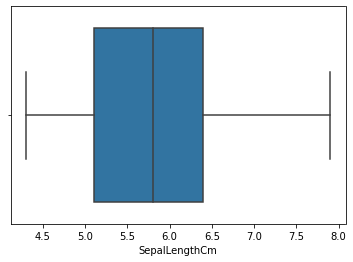

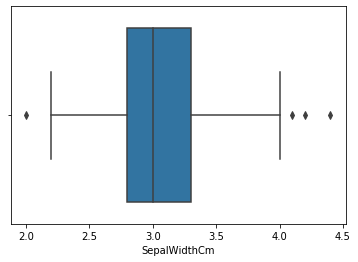

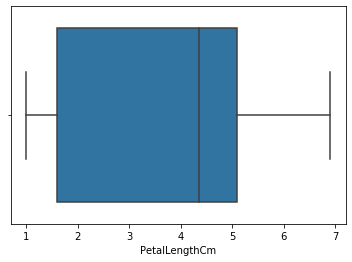

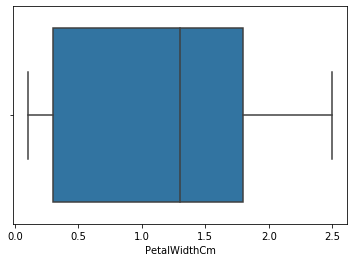

In [17]:
### checking for outliers

for i in data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]:
    sns.boxplot(x=data[i],data=data)
    plt.show()

#### found that coloumn SepalWidthCm as the outliers

In [18]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
## Removing outliers

q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
lower=q1 - IQR*1.5
upper=q3 + IQR*1.5
data = data[~((data < lower) | (data > upper))]

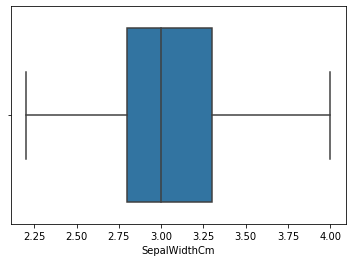

In [20]:
sns.boxplot(x=data['SepalWidthCm'],data=data)
plt.show()

#### removed all the outliers in the column SepalWidthCm

In [21]:
#### checking for null values

data.isna().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
## filling NA values

data=data.fillna(np.mean(data['SepalWidthCm']))


In [23]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Preparation 

In [24]:
X=data.iloc[:,[1,2,3,4]]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Model training

In [25]:
##WCSS method
wcss=[]
for i in range(1,16):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


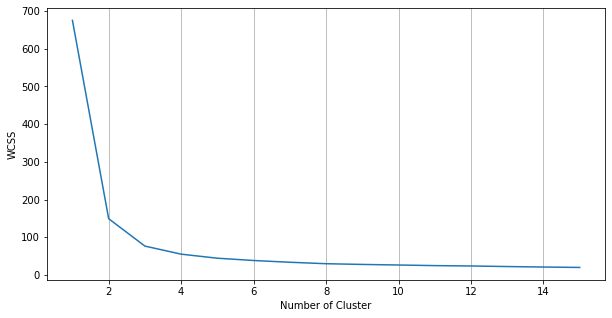

In [26]:
### ploting graph of WCSS v/s Number of cluster 

plt.figure(figsize=(10,5))
plt.plot(range(1,16),wcss)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.grid(axis='x')

#### WCSS values is low from the range 3 , hence 3 will be given in cluster value

In [27]:
### KMeans Clusturing

km=KMeans(n_clusters=3)
kfit=km.fit(X)

### Prediction

In [28]:
pd.Series(km.predict(X)).value_counts()
kpred=kfit.predict(X)

In [29]:
### checking score
silhouette_score(X,kpred)

0.554965165346262

In [30]:
data['cluster']=pd.DataFrame(kpred)

In [31]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


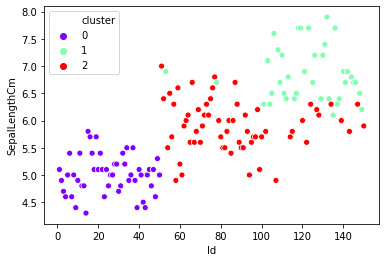

In [32]:
sns.scatterplot(x='Id',y='SepalLengthCm',data=data,hue='cluster',palette='rainbow')


In [33]:
d.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
data.loc[data['cluster']==0,'cluster']='Iris-setosa'
data.loc[data['cluster']==1,'cluster']='Iris-versicolor'
data.loc[data['cluster']==2,'cluster']='Iris-virginica'


In [36]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-versicolor
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Iris-versicolor


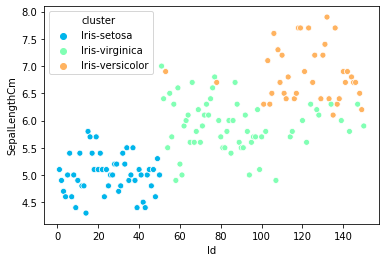

In [38]:
sns.scatterplot(x='Id',y='SepalLengthCm',data=data,hue='cluster',palette='rainbow')


### Iris data is successfully clustered into three types based on the Species  